_Методы Машинного Обучения для Задачи Ранжирования._   
Алексей Городилов (Яндекс, Москва)    
_Алгоритмы машинного обучения для задачи ранжирования интернет сайтов._   
Инна Вдовицына (рерайт)  

http://www.s3o.ru/seo/machine-learning-ranking/

_Обучение ранжированию. Попарный подход._  
Оригиналы статей: _Large Margin Rank Boundaries for Ordinal Regression._,   
_An Efficient Boosting Algorithm for Combining Preferences._    

http://www.s3o.ru/seo/pairwise-approach-part1/

http://www.s3o.ru/seo/pairwise-approach-part2/

http://www.s3o.ru/seo/pairwise-approach-part3/

_Курс "Машинное обучение" ШАД.  018. Методы обучения ранжированию_  
К.В. Воронцов

https://www.youtube.com/watch?v=EioJ902VCmk 

---

## о задаче ранжирования

**задача ранжирования**

$X$ - множество объектов   

учебный набор $\{x_1...x_\mathscr{l}\}\subset X$ - упорядоченный набор объектов   

отношение порядка на $X$   

построить $a : X \rightarrow \mathbb{R}$  такое, что
$i<j \Rightarrow a(x_i)<a(x_j)$

**линейная модель ранжирования**  
$a(x) = \left<x,w\right>$  
$x = \left( f_1(x),...f_n(x) \right) \in  \mathbb{R}^n$ - вектор признак объекта    
$w$ - параметры  

**пример**

$D$ - документы  
$Q$ - запросы  

$X = Q \times D$ - ответы на запросы

$у: X  \rightarrow R$ - заданные оценки релевантности

порядок определён только на документах найденных по одному запросу  
т.е. релевантность документов $D$ относительно запроса $q$

_отношение порядка (оценки релевантности) на учебном наборе обычно строим руками (работа асессора)_

## метрики ранжирования

**TF-IDF(q,d) как мера релевантности**


$\sum\limits_{w \in q} \mathtt{TF}(w,d)\cdot \mathtt{IDF}(w) = \sum\limits_{w\in q}  n_{dw} \cdot \log( N/N_w )$


количество совпадающих слов (TF) в запросе и документе умноженное на значимость (IDF) этих слов

**google page rank**

рекуррентный принцип:  
документ важен если на него ссылаются другие важные документы  
которые не ссылаются на на другие документы  

**точность ранжирования** [28:18]

$y(q,d)$ - релевантность  
$Y = \{0,1\}$ - бинарная разметка, релевантен/нерелевантен

$а(q,d)$ - функция ранжирования


_точность ранжирования_ (доля релевантных) по запросу q для первых $n$ документов:

$$P_n(q) = \frac{1}{n} \sum\limits_{i=1}^n y\left(q,d_q^{(i)}\right) $$


_средняя точность ранжирования_ по запросу q:

$$ AP(q) = \frac{ \sum\limits_n \left( P_n(q) \cdot y\left(q,d_q^{(n)}\right) \right) }{ \sum\limits_n y\left(q,d_q^{(n)}\right) }$$


_общая средняя точность_ ранжирования (модели):

$$MAP = \frac{1}{|Q|} \sum_{q\in Q} AP(q) $$

**доля дефектных пар**, доля инверсий порядка среди первых $n$ документов по запросу $q$

$$ DP_n(q) = \frac{2}{n(n-1)} \sum_{i<j} \left[ y(q,d_q^{(i)})<y(q,d_q^{(j)})\right] $$

где $d_q^{(i)}$ - $i$-тый документ по убыванию $a(q,d)$

связь с коэффициентом ранговой корреляции ($\tau$ Кенделла)

$$\tau(a,y) = 1 - 2\cdot DP_n(q)$$

связь с AUC (бинарная классификация $Y=\{-1,+1\}; a:X\rightarrow Y$)

$$ AUC_n(q) = \frac{1}{\mathscr{l}_-\mathscr{l}_+} \sum\limits_{i,j=1}^{n}\left[y_i>y_j\right]\cdot\left[a(x_i)<a(x_j)\right] =  \frac{n(n-1)}{2\mathscr{l}_-\mathscr{l}_+}DP_n(q) $$

**дисконтированная взвешенная сумма выигрышей**

$$DCG_n = \sum\limits^n_{i=1} G_q(d_q^{(i)}) \cdot D(i) $$
где  
$G_q(d) =  \left( 2^{y(q,d)} - 1\right)$  - больший вес релевантным документам   
$D(i) = 1/\log_2(i+1)$  - больший вес в начале выдачи

нормированная дисконтированная взвешенная сумма выигрышей

$$ NDCG_n(q) = \frac{DCG_n(q)}{\max DCG_n(q) }$$

**Яndex pFound** - модель поведения пользователя


$$pFound_n(q) = \sum\limits_{i=1}^{n} P_i \cdot y(q,d_q^{(i)})$$


$P_1 = 1$  
$P_{i+1} = P_i \cdot \left(1-y(q,d_q^{(i)})\right)\cdot(1-P_{out}) $

$P_i$ - вероятность того, что пользователь будет просматривать $i$-тый документ (дойдёт до $i$)  
$P_{out}$ - вероятность того, что пользователь бросит поиск не найдя ответа


y(q,d) | name
--- |:--- 
0.61 |vital
0.41 |useful
0.14 |relevant+
0.07 |relevant+
0.00 |not relevant

$$P_{out}=0.15$$


## подходы к ранжированию

- point-wise поточечно, строим функционал по каждому объекту отдельно
- pair-wise попарно, строим функционал с парами объектов с учётом порядка на этой паре
- list-wise списком, оцениваем сразу список объектов и отношения на них

## модели ранжирования pair-wise

отступ:

$$M_{ij} = a(x_j) - a(x_i)$$

переход к гладкому функционалу качества

$$Q(a) = \sum\limits_{i<j} \left[ M_{ij} < 0  \right] \leq \sum\limits_{i<j} \mathscr{L} \left( M_{ij} \right) \rightarrow \min $$

где  
$a(x)$ - алгоритм ранжирования  
$\mathscr{L}(M)$ - убывающая непрерывная функция отступа  

**ranking SVM**

реализует $m$ разделяющих полос между объектами с дискретными оценками ранга (одна из $m$ возможных оценок для одного объекта
)

**rankingNet**

$a(x)=<w,x>$ линейная модель

$\mathscr{L}(M) = \log(1+\exp(-\sigma M) )$ гладкая апроксимация функционала качества

$\sigma$ - параметр

шаг SGD:

$$w:= w + \eta \cdot \frac{\sigma}{1+\exp\left(\sigma \left<x_j-x_i,w\right> \right)}\cdot(x_j-x_i)$$


**lambdaRank**

домножение изменения на NDCG при перестановке $x_i$ $x_j$ приводит к оптимизации NDCG (можно использовать MAP)


$$w:= w + \eta \cdot \frac{\sigma}{1+\exp\left(\sigma \left<x_j-x_i,w\right> \right)}\cdot(x_j-x_i) \cdot |\Delta NDCG_{ij}| $$

---

Яndex

50K оценок асессоров за месяц

800 признаков добавлено за 4 года

технология MatrixNet

FML среда для тестирования методов ML

---

MathJax - библиотека для отображения математических формул (краткий справочник)

https://radioprog.ru/post/74



MathML Examples

https://elsenaju.eu/mathml/MathML-Examples.htm

Markdown | Less | Pretty
--- | --- | ---
*Still* | `renders` | **nicely**
1 | 2 | 3


----

**реализация rankingNet**


$a(x)=<w,x>$ линейная модель

$\mathscr{L}(M) = \log(1+\exp(-\sigma M) )$ гладкая апроксимация функционала качества

$\sigma$ - параметр

шаг SGD (формируем порядок $i<j$):

$$w:= w + \eta \cdot \frac{\sigma}{1+\exp\left(\sigma \left<x_j-x_i,w\right> \right)}\cdot(x_j-x_i)$$


In [1]:
import numpy as np
import numpy.random as rng
from itertools import product
from matplotlib import pyplot as plt

In [2]:
np.set_printoptions(precision=2) # вывод на печать чисел до 2 знака

In [3]:
dim = 8
n = 512

# X = rng.rand(n,dim).astype(np.float32)
X = rng.normal(loc=0.0, scale=1.0, size=(n,dim)).astype(np.float32)
X.shape

(512, 8)

In [4]:
# X.sort(axis=0)
# X = rng.permutation(X)

----

In [5]:
w  = rng.rand(dim).astype(np.float32) # вектор весов

In [6]:
np.argsort( X.dot(w) )

array([ 61, 260, 184, 202, 127, 263, 356,  93, 472, 312, 286, 185,  84,
       463, 328, 508, 324, 116, 429, 342, 269, 143, 177, 278, 128, 241,
       337, 434, 201, 500, 245, 141, 406, 419, 338, 198, 510, 145,  28,
       195, 295, 409, 408,  70, 486, 352, 276, 118,  55, 317, 129, 210,
       425,  67, 300,  49, 284,  90,  11, 364, 453, 469, 113, 387, 350,
       462, 108,  71, 366, 268, 103, 218, 150, 315, 243,  41, 405, 467,
        40, 257, 179, 449, 403, 223,  42, 370, 221, 175, 234,   5, 189,
       187, 135,  44, 504, 417, 238,  35, 318, 368, 217, 344,  88,  32,
       211, 477, 313, 503, 228, 443, 470, 492, 473, 170, 374, 282,  94,
       107, 369, 291, 259, 416,  21, 110, 423,  69, 380, 357, 222,  72,
       497,  19, 306, 294, 273, 481, 293, 319, 321, 451, 385,  95, 102,
        33, 167,  62, 119, 495, 391, 506, 393, 433, 209, 148, 105, 249,
       475, 400, 482, 460, 367, 381,  10, 355,  30, 140, 465, 304, 375,
       326, 305, 414, 152,  92, 354, 446, 383, 422, 227,  96, 24

$a(x)=<w,x>$ линейная модель

In [7]:
sig = 0.95

In [8]:
def loss(x0,x1,w,sig=sig):
    d = x0.dot(w) - x1.dot(w) 
    return np.log(1.+np.exp(-sig*d))

$$\mathscr{L}(M) = \log(1+\exp(-\sigma M) )$$

In [9]:
def grad(x0,x1,w,sig=sig):
    d = x0 - x1
    return (sig/(1.+np.exp(sig*d.dot(w))))[:,np.newaxis]*d

$$\Delta w = \frac{\sigma}{1+\exp\left(\sigma \left<x_j-x_i,w\right> \right)}\cdot(x_j-x_i)$$

In [10]:
lr = .1 # скорость обучения
lr_factor = .5 # изменение скорости обучения
lr_min = .001 # минимальное значение скорости обучения
lr_hist = [] # история изменения скорости обучения

loss_hist = [] # история изменения потери

batch_size = 24 # размер батча
n_epoch = 16 # количество циклов обучения

In [11]:
%%time

for _ in range(n_epoch):
    # упорядоченные пары примеров i<j
    idx = [ [i,j] for i,j in product(range(n),range(n)) if i<j]
    # количество батчей в датасете
    batch_parts = np.floor(len(idx)/batch_size).astype(int)
    for ii in np.array_split(rng.permutation(idx),batch_parts ): # формируем батчи
        x0,x1 = X[ ii[:,0],:], X[ ii[:,1],:] # упорядоченные пары примеров батча
        loss_hist.append( loss(x0,x1,w).sum()/x0.shape[0] ) # текущая потеря
        dw = grad(x0,x1,w).sum(axis=0)/x0.shape[0] # изменение параметров
        w += lr*dw # корректируем параметры
        
    lr_hist.append(lr)         
    lr = lr if (lr<lr_min) else lr*lr_factor # корректируем скорость обучения

CPU times: user 5.32 s, sys: 73.1 ms, total: 5.39 s
Wall time: 5.39 s


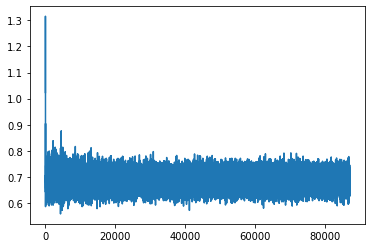

In [12]:
# изменение потери
plt.plot(loss_hist)

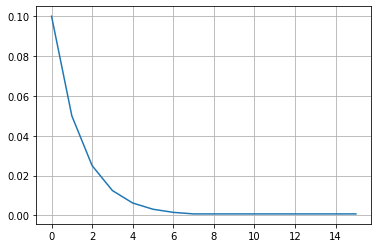

In [13]:
# изменение скорости обучения
plt.plot(lr_hist)
plt.grid()

In [14]:
w

array([-0.02, -0.03,  0.02,  0.17, -0.01,  0.07, -0.  ,  0.02],
      dtype=float32)

In [15]:
np.argsort( X.dot(w) )[::-1] # результат работы, порядок примеров по убыванию оценки 

array([ 51, 188, 297, 111,  39, 137, 411,  59, 261, 266, 314,  43, 506,
       239, 204, 142, 264,  29, 382, 232, 277, 283, 154, 290, 116,  27,
       384, 229, 288,  60,  78, 237, 271,  80, 132,  46, 194,   7, 441,
        24, 114, 262, 147, 280, 131, 289, 258, 390, 212,  32, 330, 228,
       209, 193, 176, 153,  22,  26, 315, 333, 407, 459,  17, 295, 388,
       180, 104, 208, 230, 371, 246, 435, 162, 164, 216, 249, 354, 185,
       152, 112,  20, 302, 334, 298, 378, 376,  37, 122, 100, 136,  21,
       374, 168, 224, 192, 119, 428, 240,  81,   9, 211, 343, 324,  93,
       133,  54, 503, 166, 311, 336, 340, 146, 183, 460,  48,  18, 117,
       331, 236, 416, 163, 115, 325, 483, 130, 397,  52,   2, 509, 328,
       252, 323, 341, 121, 285, 155, 468, 316, 490, 344,  74, 276, 173,
       352,   0,  15, 357, 272,  87, 159, 186, 284, 103, 270,  99,  75,
       355, 278, 456, 219, 347, 220, 458, 337, 484, 149, 165, 123, 124,
        97,  95, 448, 351, 482, 151,  96,   6, 414, 377, 282, 27

In [16]:
X[np.argsort( X.dot(w) )[::-1],:][:10,:]

array([[ 0.28,  0.01, -0.24,  3.77,  0.45,  1.25,  0.35,  0.06],
       [-1.03,  1.72,  1.05,  2.58, -0.57,  1.26, -0.04, -0.27],
       [-0.4 , -0.02,  0.32,  2.63,  0.57,  1.2 ,  0.87, -1.05],
       [ 0.36,  0.19,  0.88,  2.22,  0.14,  1.74, -0.05, -0.59],
       [-0.1 , -1.31, -0.23,  1.63, -0.72,  1.74, -0.58,  1.17],
       [ 0.8 ,  0.17,  0.44,  2.3 ,  0.48,  0.82,  1.01,  1.35],
       [-1.46, -1.33,  0.83,  1.76, -0.89,  0.29, -0.09,  2.18],
       [ 0.14, -0.9 ,  0.43,  2.43, -0.84, -0.07, -0.33,  0.1 ],
       [-1.32, -0.45, -0.35,  1.  ,  0.67,  3.  ,  0.23,  1.11],
       [ 0.58,  0.16,  2.24,  1.75,  0.2 ,  1.4 , -0.12, -0.52]],
      dtype=float32)

In [17]:
np.sort(X.dot(w))[::-1] # оценки по убыванию 

array([ 7.00e-01,  5.02e-01,  5.01e-01,  4.79e-01,  4.58e-01,  4.48e-01,
        4.37e-01,  4.36e-01,  4.19e-01,  3.96e-01,  3.95e-01,  3.85e-01,
        3.74e-01,  3.71e-01,  3.63e-01,  3.58e-01,  3.55e-01,  3.48e-01,
        3.40e-01,  3.36e-01,  3.28e-01,  3.27e-01,  3.26e-01,  3.25e-01,
        3.20e-01,  3.20e-01,  3.17e-01,  3.15e-01,  3.14e-01,  3.14e-01,
        3.13e-01,  3.12e-01,  3.10e-01,  3.05e-01,  3.03e-01,  2.96e-01,
        2.94e-01,  2.94e-01,  2.92e-01,  2.92e-01,  2.91e-01,  2.88e-01,
        2.77e-01,  2.73e-01,  2.72e-01,  2.64e-01,  2.62e-01,  2.62e-01,
        2.59e-01,  2.55e-01,  2.54e-01,  2.53e-01,  2.51e-01,  2.50e-01,
        2.49e-01,  2.48e-01,  2.46e-01,  2.46e-01,  2.44e-01,  2.43e-01,
        2.43e-01,  2.42e-01,  2.37e-01,  2.35e-01,  2.32e-01,  2.29e-01,
        2.28e-01,  2.23e-01,  2.23e-01,  2.14e-01,  2.12e-01,  2.08e-01,
        2.06e-01,  2.04e-01,  2.04e-01,  2.03e-01,  2.03e-01,  2.02e-01,
        2.02e-01,  2.01e-01,  2.01e-01,  2.00e-01, 

In [18]:
# idx = rng.permutation([ [i,j] for i,j in product(range(n),range(n))])
# d = X[ idx[:,0],:] - X[ idx[:,1],:]
# dw = (lsp * ( sig / ( 1. + np.exp( sig* d.dot(w) ) ) )[:,np.newaxis]*d).sum(axis=0)

In [19]:
# for i,j in product(range(n),range(n)):
# [ [i,j] for i,j in product(range(n),range(n)) ]
# sig